<a href="https://colab.research.google.com/github/seher13/PartialLeastSquares/blob/main/PLS_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://towardsdatascience.com/partial-least-squares-f4e6714452a

#Example 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install fsspec
!pip install s3fs
!pip install boto

import boto
data = pd.read_csv('s3://articledatas3/meats.csv')

     |████████████████████████████████| 134 kB 21.1 MB/s 
     |████████████████████████████████| 1.1 MB 26.8 MB/s 
     |████████████████████████████████| 57 kB 4.9 MB/s 
     |████████████████████████████████| 8.4 MB 29.3 MB/s 
     |████████████████████████████████| 271 kB 42.1 MB/s 
     |████████████████████████████████| 144 kB 64.4 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 138 kB 41.3 MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-2.1.1-py3-none-any.whl size=55483 sha256=40b6fd76cd95b7bbf8db9cb651ae63f72da0c1c2bdbec2bf035a9043dfbfd737
  Stored in directory: /root/.cache/pip/wheels/52/fd/d3/e85dd95a98c12426ed6864dc24a408c3ca3253d4387b2f1cce
Successfully built aiobotocore
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: urllib3
    F

In [93]:
data.shape

(215, 103)

In [3]:
data.head()

,Unnamed: 0,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,x_010,x_011,x_012,x_013,x_014,x_015,x_016,x_017,x_018,x_019,x_020,x_021,x_022,x_023,x_024,x_025,x_026,x_027,x_028,x_029,x_030,x_031,x_032,x_033,x_034,x_035,x_036,x_037,x_038,x_039,...,x_064,x_065,x_066,x_067,x_068,x_069,x_070,x_071,x_072,x_073,x_074,x_075,x_076,x_077,x_078,x_079,x_080,x_081,x_082,x_083,x_084,x_085,x_086,x_087,x_088,x_089,x_090,x_091,x_092,x_093,x_094,x_095,x_096,x_097,x_098,x_099,x_100,water,fat,protein
0,1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,2.62964,2.63245,2.63565,2.63933,2.64353,2.64825,2.65350,2.65937,2.66585,2.67281,2.68008,2.68733,2.69427,2.70073,2.70684,2.71281,2.71914,2.72628,2.73462,2.74416,2.75466,2.76568,2.77679,2.78790,2.79949,2.81225,2.82706,2.84356,2.86106,...,3.39418,3.39490,3.39366,3.39045,3.38541,3.37869,3.37041,3.36073,3.34979,3.33769,3.32443,3.31013,3.29487,3.27891,3.26232,3.24542,3.22828,3.21080,3.19287,3.17433,3.15503,3.13475,3.11339,3.09116,3.06850,3.04596,3.02393,3.00247,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,60.5,22.5,16.7
1,2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,2.88264,2.88898,2.89577,2.90308,2.91097,2.91953,2.92873,2.93863,2.94929,2.96072,2.97272,2.98493,2.99690,3.00833,3.01920,3.02990,3.04101,3.05345,3.06777,3.08416,3.10221,3.12106,3.13983,3.15810,3.17623,3.19519,3.21584,3.23747,3.25889,...,3.56045,3.56034,3.55876,3.55571,3.55132,3.54585,3.53950,3.53235,3.52442,3.51583,3.50668,3.49700,3.48683,3.47626,3.46552,3.45501,3.44481,3.43477,3.42465,3.41419,3.40303,3.39082,3.37731,3.36265,3.34745,3.33245,3.31818,3.30473,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,46.0,40.1,13.5
2,3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,2.60414,2.60714,2.61029,2.61361,2.61714,2.62089,2.62486,2.62909,2.63361,2.63835,2.64330,2.64838,2.65354,2.65870,2.66375,2.66880,2.67383,2.67892,2.68411,2.68937,2.69470,2.70012,2.70563,2.71141,2.71775,2.72490,2.73344,2.74327,2.75433,...,3.18039,3.17411,3.16611,3.15641,3.14512,3.13241,3.11843,3.10329,3.08714,3.07014,3.05237,3.03393,3.01504,2.99569,2.97612,2.95642,2.93660,2.91667,2.89655,2.87622,2.85563,2.83474,2.81361,2.79235,2.77113,2.75015,2.72956,2.70934,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,71.0,8.4,20.5
3,4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,2.84374,2.84664,2.84975,2.85307,2.85661,2.86038,2.86437,2.86860,2.87308,2.87789,2.88301,2.88832,2.89374,2.89917,2.90457,2.90991,2.91521,2.92043,2.92565,2.93082,2.93604,2.94128,2.94658,2.95202,2.95777,2.96419,2.97159,2.98045,2.99090,...,3.51036,3.50682,3.50140,3.49398,3.48457,3.47333,3.46041,3.44595,3.43005,3.41285,3.39450,3.37511,3.35482,3.33376,3.31204,3.28986,3.26730,3.24442,3.22117,3.19757,3.17357,3.14915,3.12429,3.09908,3.07366,3.04825,3.02308,2.99820,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,72.8,5.9,20.7
4,5,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,2.81272,2.81704,2.82184,2.82710,2.83294,2.83945,2.84664,2.85458,2.86331,2.87280,2.88291,2.89335,2.90374,2.91371,2.92305,2.93187,2.94060,2.94986,2.96035,2.97241,2.98606,3.00097,3.01652,3.03220,3.04793,3.06413,3.08153,3.10078,3.12185,...,3.74357,3.74453,3.74336,3.73991,3.73418,3.72638,3.71676,3.70553,3.69289,3.67900,3.66396,3.64785,3.63085,3.61305,3.59463,3.57582,3.55695,3.53796,3.51880,3.49936,3.47938,3.45869,3.43711,3.41458,3.39129,3.36772,3.34450,3.32201,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,58.3,25.5,15.5


In [4]:
data = data.drop('Unnamed: 0', axis=1)

In [5]:
meats_train = data.iloc[0:130,:]
meats_val = data.iloc[130:175, :]
meats_test = data.iloc[175:215, :]

In [6]:
X_colnames = data.columns[:-3]

In [7]:
X_colnames

Index(['x_001', 'x_002', 'x_003', 'x_004', 'x_005', 'x_006', 'x_007', 'x_008',
       'x_009', 'x_010', 'x_011', 'x_012', 'x_013', 'x_014', 'x_015', 'x_016',
       'x_017', 'x_018', 'x_019', 'x_020', 'x_021', 'x_022', 'x_023', 'x_024',
       'x_025', 'x_026', 'x_027', 'x_028', 'x_029', 'x_030', 'x_031', 'x_032',
       'x_033', 'x_034', 'x_035', 'x_036', 'x_037', 'x_038', 'x_039', 'x_040',
       'x_041', 'x_042', 'x_043', 'x_044', 'x_045', 'x_046', 'x_047', 'x_048',
       'x_049', 'x_050', 'x_051', 'x_052', 'x_053', 'x_054', 'x_055', 'x_056',
       'x_057', 'x_058', 'x_059', 'x_060', 'x_061', 'x_062', 'x_063', 'x_064',
       'x_065', 'x_066', 'x_067', 'x_068', 'x_069', 'x_070', 'x_071', 'x_072',
       'x_073', 'x_074', 'x_075', 'x_076', 'x_077', 'x_078', 'x_079', 'x_080',
       'x_081', 'x_082', 'x_083', 'x_084', 'x_085', 'x_086', 'x_087', 'x_088',
       'x_089', 'x_090', 'x_091', 'x_092', 'x_093', 'x_094', 'x_095', 'x_096',
       'x_097', 'x_098', 'x_099', 'x_100'],
      dt

In [8]:
Y_colnames = data.columns[-3:]

In [9]:
Y_colnames

Index(['water', 'fat', 'protein'], dtype='object')

In [10]:
x_train = meats_train[X_colnames].values
y_train = meats_train[Y_colnames].values

x_val = meats_val[X_colnames].values
y_val = meats_val[Y_colnames].values

x_test = meats_test[X_colnames].values
y_test = meats_test[Y_colnames].values

In [11]:
pip install scikit-learn

In [12]:
import sklearn

In [13]:
from sklearn.cross_decomposition import PLSRegression

In [14]:
my_plsr = PLSRegression(n_components=100, scale=True)

In [15]:
my_plsr.fit(x_train, y_train)

PLSRegression(n_components=100)

In [16]:
print(my_plsr.fit(x_train, y_train))

PLSRegression(n_components=100)


In [17]:
from math import sqrt

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
import matplotlib.pyplot as plt

In [20]:
water_plot = []
fat_plot = []
protein_plot = []

In [21]:
for n_comp in range(1,101):
  my_plsr = PLSRegression(n_components=n_comp, scale=True)
  my_plsr.fit(x_train, y_train)
  preds = my_plsr.predict(x_val)

  water_rmse = sqrt(mean_squared_error(y_val[:,0], preds[:,0]))
  fat_rmse = sqrt(mean_squared_error(y_val[:,1], preds[:,1]))
  protein_rmse = sqrt(mean_squared_error(y_val[:,2], preds[:,2]))

  water_plot.append( water_rmse)
  fat_plot.append ( fat_rmse)
  protein_plot.append(protein_rmse)

Text(0, 0.5, 'RMSE')

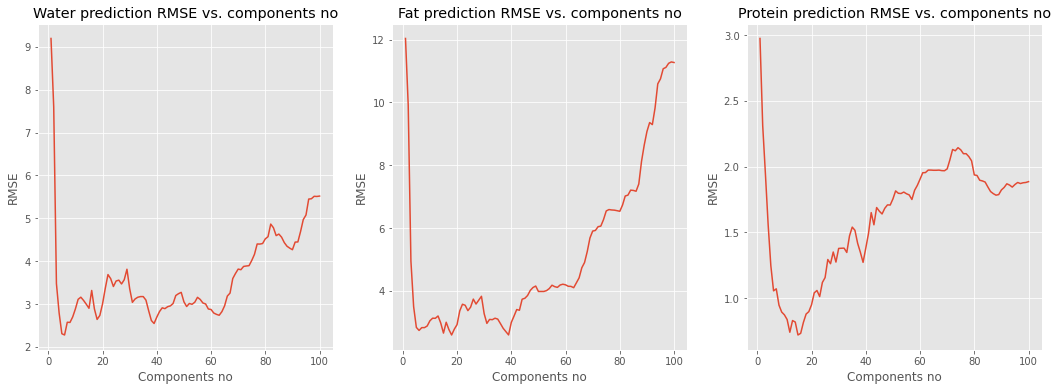

In [30]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(range(1, 101), water_plot)
ax2.plot(range(1,101), fat_plot)
ax3.plot(range(1,101), protein_plot)

ax1.set_title('Water prediction RMSE vs. components no')
ax1.set_xlabel('Components no')
ax1.set_ylabel('RMSE')

ax2.set_title('Fat prediction RMSE vs. components no')
ax2.set_xlabel('Components no')
ax2.set_ylabel('RMSE')

ax3.set_title('Protein prediction RMSE vs. components no')
ax3.set_xlabel('Components no')
ax3.set_ylabel('RMSE')

In [31]:
np.min(water_plot)

2.2784614062192174

In [32]:
index_min_water = min(range(len(water_plot)), key=water_plot.__getitem__)
index_min_fat = min(range(len(fat_plot)), key=fat_plot.__getitem__)
index_min_protein = min(range(len(protein_plot)), key=protein_plot.__getitem__)

In [33]:
index_min_water

5

In [34]:
index_min_fat

17

In [35]:
index_min_protein

14

In [36]:
#coefficients plot

# fit and extract coefs for 1 comp
my_plsr1 = PLSRegression(n_components=1, scale=True)
my_plsr1.fit(x_train, y_train)

PLSRegression(n_components=1)

In [37]:
water_1comp = my_plsr1.coef_[:,0]
fat_1comp = my_plsr1.coef_[:,1]
protein_1comp = my_plsr1.coef_[:,2]

In [38]:
my_plsr2 = PLSRegression(n_components=2, scale=True)
my_plsr2.fit(x_train, y_train)

water_2comp = my_plsr2.coef_[:,0]
fat_2comp = my_plsr2.coef_[:,1]
protein_2comp = my_plsr2.coef_[:,2]

In [39]:
my_plsr3 = PLSRegression(n_components=3, scale=True)
my_plsr3.fit(x_train, y_train)

water_3comp = my_plsr3.coef_[:,0]
fat_3comp = my_plsr3.coef_[:,1]
protein_3comp = my_plsr3.coef_[:,2]

In [65]:
my_plsr5 = PLSRegression(n_components=5, scale=True)
my_plsr5.fit(x_train, y_train)

water_5comp = my_plsr5.coef_[:,0]
fat_5comp = my_plsr5.coef_[:,1]
protein_5comp = my_plsr5.coef_[:,2]

In [66]:
my_plsr10 = PLSRegression(n_components=10, scale=True)
my_plsr10.fit(x_train, y_train)

water_10comp = my_plsr10.coef_[:,0]
fat_10comp = my_plsr10.coef_[:,1]
protein_10comp = my_plsr10.coef_[:,2]

In [67]:
my_plsr15 = PLSRegression(n_components=15, scale=True)
my_plsr15.fit(x_train, y_train)

water_15comp = my_plsr15.coef_[:,0]
fat_15comp = my_plsr15.coef_[:,1]
protein_15comp = my_plsr15.coef_[:,2]

In [68]:
my_plsr20 = PLSRegression(n_components=20, scale=True)
my_plsr20.fit(x_train, y_train)

water_20comp = my_plsr20.coef_[:,0]
fat_20comp = my_plsr20.coef_[:,1]
protein_20comp = my_plsr20.coef_[:,2]

In [69]:
my_plsr30 = PLSRegression(n_components=30, scale=True)
my_plsr30.fit(x_train, y_train)

water_30comp = my_plsr30.coef_[:,0]
fat_30comp = my_plsr30.coef_[:,1]
protein_30comp = my_plsr30.coef_[:,2]

In [70]:
my_plsr75 = PLSRegression(n_components=75, scale=True)
my_plsr75.fit(x_train, y_train)

water_75comp = my_plsr75.coef_[:,0]
fat_75comp = my_plsr75.coef_[:,1]
protein_75comp = my_plsr75.coef_[:,2]

Text(0, 0.5, 'Coefficient value')

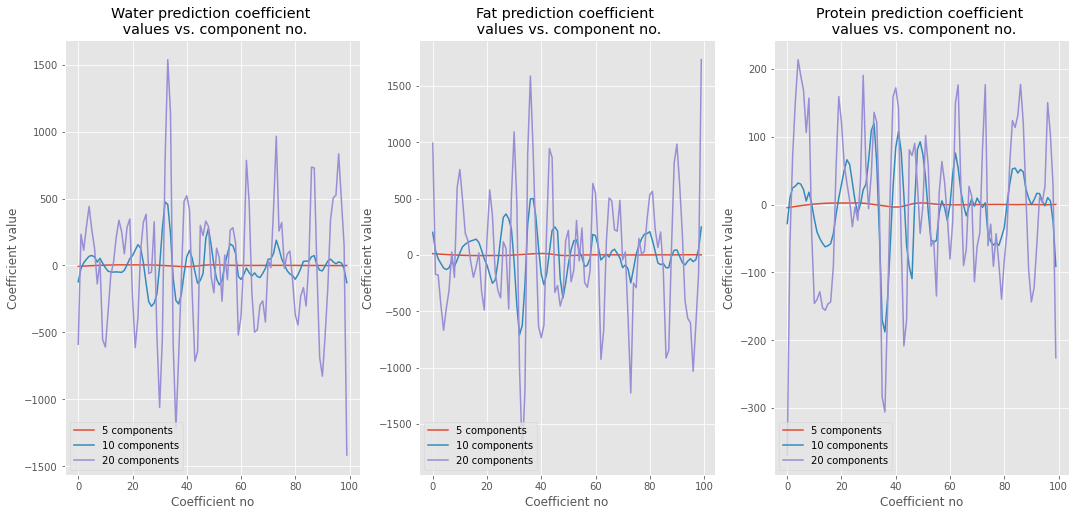

In [87]:
#Showing coefficient variability when changing componensts number. We can also observe the most important coefficients

fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(water_5comp)
ax1.plot(water_15comp)
ax1.plot(water_20comp)
ax1.legend(['5 components','10 components', '20 components'],loc='lower left')

ax2.plot(fat_5comp)
ax2.plot(fat_15comp)
ax2.plot(fat_20comp)
ax2.legend(['5 components','10 components', '20 components'], loc='lower left')

ax3.plot(protein_5comp)
ax3.plot(protein_15comp)
ax3.plot(protein_20comp)
ax3.legend(['5 components','10 components', '20 components'], loc='lower left')

ax1.set_title('Water prediction coefficient \n values vs. component no.')
ax1.set_xlabel('Coefficient no')
ax1.set_ylabel('Coefficient value')

ax2.set_title('Fat prediction coefficient \n values vs. component no.')
ax2.set_xlabel('Coefficient no')
ax2.set_ylabel('Coefficient value')

ax3.set_title('Protein prediction coefficient \n values vs. component no.')
ax3.set_xlabel('Coefficient no')
ax3.set_ylabel('Coefficient value')

Conclusion: The higher the number of components in PLS, the higher the coefficient variability and absolute values

In [88]:
from sklearn.metrics import r2_score

my_plsr_test = PLSRegression(n_components=15, scale=True)
my_plsr_test.fit(x_train, y_train)
preds_test = my_plsr_test.predict(x_val)

In [89]:
r2_test = r2_score(y_val, preds_test)
r2_test

0.9418150350731255

In [90]:
# find best value for n_comp
from sklearn.metrics import r2_score

best_r2 = 0
best_ncomp = 0
for n_comp in range(1,101):
  my_plsr = PLSRegression(n_components=n_comp, scale=True)
  my_plsr.fit(x_train, y_train)
  preds = my_plsr.predict(x_val)

  r2 = r2_score(y_val, preds)
  if r2 > best_r2:
    best_r2 = r2
    best_ncomp = n_comp
  
print(best_r2, best_ncomp)

0.9418150350731255 15


In [94]:
preds.shape

(45, 3)

In [98]:
my_plsr_best = PLSRegression(n_components=best_ncomp, scale=True)
my_plsr_best.fit(x_train, y_train)
preds_best = my_plsr_best.predict(x_test)
r2_score(y_test, preds_best)

0.9562812186452879

#Example 2

In [99]:
data_oo = pd.read_csv('s3://articledatas3/olive_oil.csv')
data_oo = data_oo.drop('Unnamed: 0', axis=1)

In [100]:
data_oo.head()

,Acidity,Peroxide,K232,K270,DK,yellow,green,brown,glossy,transp,syrup,countries
0,0.73,12.7,1.900,0.139,0.003,21.4,73.4,10.1,79.7,75.2,50.3,Greece
1,0.19,12.3,1.678,0.116,-0.004,23.4,66.3,9.8,77.8,68.7,51.7,Greece
2,0.26,10.3,1.629,0.116,-0.005,32.7,53.5,8.7,82.3,83.2,45.4,Greece
3,0.67,13.7,1.701,0.168,-0.002,30.2,58.3,12.2,81.1,77.1,47.8,Greece
4,0.52,11.2,1.539,0.119,-0.001,51.8,32.5,8.0,72.4,65.3,46.5,Greece


In [101]:
# get dummies will dummy code your categorial variables (also called one-hot encoding)

dummified_data = pd.get_dummies(data_oo)
dummified_data

,Acidity,Peroxide,K232,K270,DK,yellow,green,brown,glossy,transp,syrup,countries_Greece,countries_Italy,countries_Spain
0,0.73,12.70,1.900,0.1390,0.003,21.4,73.4,10.1,79.7,75.2,50.3,1,0,0
1,0.19,12.30,1.678,0.1160,-0.004,23.4,66.3,9.8,77.8,68.7,51.7,1,0,0
2,0.26,10.30,1.629,0.1160,-0.005,32.7,53.5,8.7,82.3,83.2,45.4,1,0,0
3,0.67,13.70,1.701,0.1680,-0.002,30.2,58.3,12.2,81.1,77.1,47.8,1,0,0
4,0.52,11.20,1.539,0.1190,-0.001,51.8,32.5,8.0,72.4,65.3,46.5,1,0,0
5,0.26,18.70,2.117,0.1420,0.001,40.7,42.9,20.1,67.7,63.5,52.2,0,1,0
6,0.24,15.30,1.891,0.1160,0.000,53.8,30.4,11.5,77.8,77.3,45.2,0,1,0
7,0.30,18.50,1.908,0.1250,0.001,26.4,66.5,14.2,78.7,74.6,51.8,0,1,0
8,0.35,15.60,1.824,0.1040,0.000,65.7,12.1,10.3,81.6,79.6,48.3,0,1,0
9,0.19,19.40,2.222,0.1580,-0.003,45.0,31.9,28.4,75.7,72.9,52.8,0,1,0


In [102]:
data_oo

,Acidity,Peroxide,K232,K270,DK,yellow,green,brown,glossy,transp,syrup,countries
0,0.73,12.70,1.900,0.1390,0.003,21.4,73.4,10.1,79.7,75.2,50.3,Greece
1,0.19,12.30,1.678,0.1160,-0.004,23.4,66.3,9.8,77.8,68.7,51.7,Greece
2,0.26,10.30,1.629,0.1160,-0.005,32.7,53.5,8.7,82.3,83.2,45.4,Greece
3,0.67,13.70,1.701,0.1680,-0.002,30.2,58.3,12.2,81.1,77.1,47.8,Greece
4,0.52,11.20,1.539,0.1190,-0.001,51.8,32.5,8.0,72.4,65.3,46.5,Greece
5,0.26,18.70,2.117,0.1420,0.001,40.7,42.9,20.1,67.7,63.5,52.2,Italy
6,0.24,15.30,1.891,0.1160,0.000,53.8,30.4,11.5,77.8,77.3,45.2,Italy
7,0.30,18.50,1.908,0.1250,0.001,26.4,66.5,14.2,78.7,74.6,51.8,Italy
8,0.35,15.60,1.824,0.1040,0.000,65.7,12.1,10.3,81.6,79.6,48.3,Italy
9,0.19,19.40,2.222,0.1580,-0.003,45.0,31.9,28.4,75.7,72.9,52.8,Italy


In [103]:
y = dummified_data.iloc[:,-3:]

In [104]:
y

,countries_Greece,countries_Italy,countries_Spain
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [105]:
x = dummified_data.iloc[:,:-3]

In [106]:
x

,Acidity,Peroxide,K232,K270,DK,yellow,green,brown,glossy,transp,syrup
0,0.73,12.70,1.900,0.1390,0.003,21.4,73.4,10.1,79.7,75.2,50.3
1,0.19,12.30,1.678,0.1160,-0.004,23.4,66.3,9.8,77.8,68.7,51.7
2,0.26,10.30,1.629,0.1160,-0.005,32.7,53.5,8.7,82.3,83.2,45.4
3,0.67,13.70,1.701,0.1680,-0.002,30.2,58.3,12.2,81.1,77.1,47.8
4,0.52,11.20,1.539,0.1190,-0.001,51.8,32.5,8.0,72.4,65.3,46.5
5,0.26,18.70,2.117,0.1420,0.001,40.7,42.9,20.1,67.7,63.5,52.2
6,0.24,15.30,1.891,0.1160,0.000,53.8,30.4,11.5,77.8,77.3,45.2
7,0.30,18.50,1.908,0.1250,0.001,26.4,66.5,14.2,78.7,74.6,51.8
8,0.35,15.60,1.824,0.1040,0.000,65.7,12.1,10.3,81.6,79.6,48.3
9,0.19,19.40,2.222,0.1580,-0.003,45.0,31.9,28.4,75.7,72.9,52.8


In [107]:
from sklearn.cross_decomposition import PLSRegression

In [112]:
my_plsr = PLSRegression(n_components=2, scale=False)
my_plsr.fit(x, y)

PLSRegression(scale=False)

In [113]:
# hand made biplot in Python

# extract scores (one score per individual per component)

scores_df = pd.DataFrame(my_plsr.x_scores_)

In [114]:
scores_df

,0,1
0,48.527846,-8.328888
1,43.782254,-3.187998
2,24.449381,-11.126856
3,31.309076,-5.158738
4,2.408509,5.665941
5,18.846082,17.596625
6,-3.537141,2.389250
7,41.008794,-0.727599
8,-25.274579,4.058989
9,5.125541,17.674141


In [115]:
std_scores_dim1 = 2*((scores_df[0] - min(scores_df[0]))/(max(scores_df[0]) - min(scores_df[0]))) - 1
std_scores_dim2 = 2*((scores_df[1] - min(scores_df[1]))/(max(scores_df[1]) - min(scores_df[1]))) - 1


In [116]:
std_scores_dim1

0     1.000000
1     0.887661
2     0.430007
3     0.592392
4    -0.091751
5     0.297364
6    -0.232499
7     0.822007
8    -0.747074
9    -0.027433
10   -0.896485
11   -1.000000
12   -0.756523
13   -0.780043
14   -0.932042
15   -0.945841
Name: 0, dtype: float64

In [117]:
# extract loadings (one loading per variable per component)

loadings_df = pd.DataFrame(my_plsr.x_loadings_)

In [118]:
loadings_df

,0,1
0,0.002841,-0.003384
1,0.044596,0.292891
2,0.004334,0.018668
3,0.000516,0.000844
4,0.000027,0.000068
5,-0.625038,0.027022
6,0.751168,-0.305040
7,0.025133,0.456820
8,-0.113903,-0.529905
9,-0.170986,-0.629005


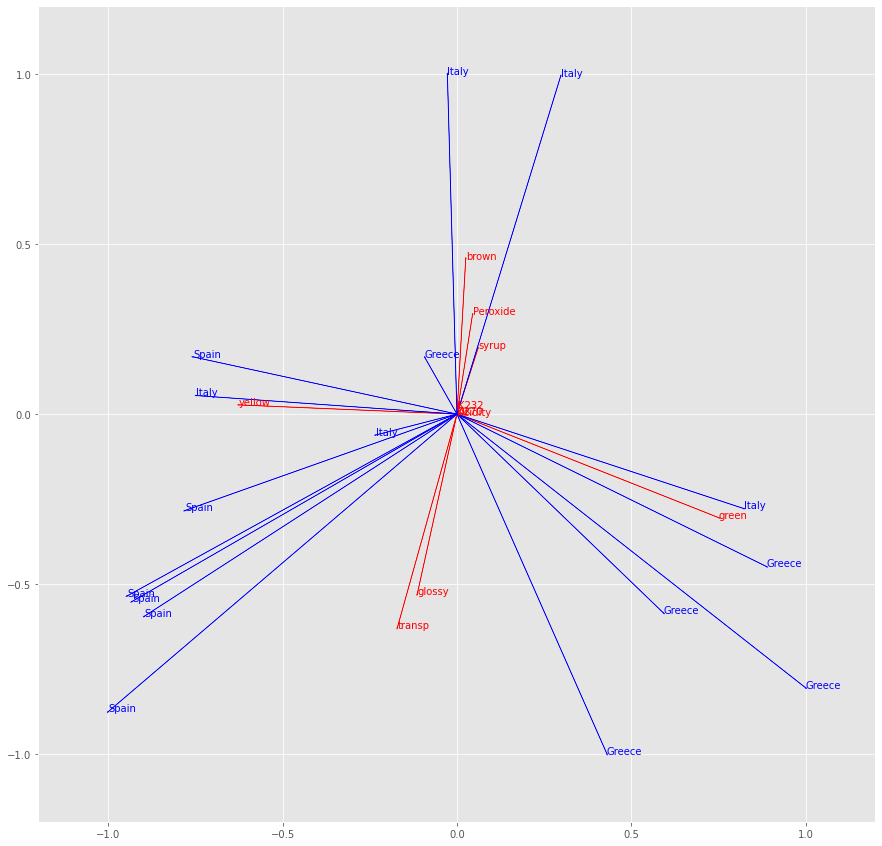

In [119]:
plt.figure(figsize=(15,15))
plt.xlim((-1.2,1.2))
plt.ylim((-1.2,1.2))

for i, var_i in enumerate(dummified_data.columns[0:11]):
  x_load = loadings_df.iloc[i,0]
  y_load = loadings_df.iloc[i,1]

  plt.arrow(0,0,x_load, y_load, color='red')
  plt.text(x_load, y_load, var_i, color='red')

for i in range(len(std_scores_dim1)):
  x_score = std_scores_dim1[i]
  y_score = std_scores_dim2[i]

  plt.arrow(0,0,x_score,y_score, color='blue')
  plt.text(x_score,y_score, data_oo.loc[i,'countries'], color='blue')

